<a href="https://colab.research.google.com/github/mikakia/Project-in-HealthCare/blob/main/Healthcare_Risk_Factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import  missingno as msno

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict

import shap
from lime.lime_tabular import LimeTabularExplainer

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import dice_ml

#Exploring the Dataset

In [ ]:
url = "https://raw.githubusercontent.com/mikakia/Project-in-HealthCare/main/dirty_v3_path.csv"
df = pd.read_csv(url)
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [ ]:
df.shape

In [ ]:
#df.iloc[0:3, 2:4]
df.iloc[[0, 1337]]
#df.iloc[:, [0]]

In [ ]:
df[['Gender', 'BMI']]
#df.BMI

In [ ]:
df.dtypes

In [ ]:
df.info()

#Preprocessing

##Checking correlation and missing values

In [ ]:
#columns' names to lower case
df.columns = ['age', 'gender', 'medical_condition', 'glucose', 'blood_pressure',
       'bmi', 'oxygen_saturation', 'lengthofstay', 'cholesterol',
       'triglycerides', 'hba1c', 'smoking', 'alcohol', 'physical_activity',
       'diet_score', 'family_history', 'stress_level', 'sleep_hours',
       'random_notes', 'noise_col']
df.head()

,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [ ]:
df.describe()

###Check for outliers in noise_col

In [ ]:
print("Min value:", df['noise_col'].min())
print("Max value:", df['noise_col'].max())

In [ ]:
df.corr(numeric_only=True)

In [ ]:
df.select_dtypes(exclude=['number']).head()

,gender,medical_condition,random_notes
0,Male,Diabetes,lorem
1,Male,Healthy,ipsum
2,NaN,Asthma,ipsum
3,NaN,Obesity,lorem
4,Female,Hypertension,lorem


## Plots

In [ ]:
#SUBPLOTS

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) #1 row,2 plots

# BMI
axes[0].hist(df['bmi'], bins=10, color='darkcyan', edgecolor='black')
axes[0].set_title('BMI Distribution')

# Age
axes[1].hist(df['age'], bins=10, color='orange', edgecolor='black')
axes[1].set_title('Age Distribution')

plt.tight_layout()
plt.show()

In [ ]:
#Pairplots
numeric_cols = ['age', 'smoking', 'blood_pressure']

sns.pairplot(df, vars=numeric_cols, hue='medical_condition', diag_kind='hist', palette='Set1')
plt.show()

## Find and replace missing values

In [ ]:
df.info()
df.isnull().sum()

In [ ]:
msno.matrix(df)

In [ ]:
msno.heatmap(df)
plt.show()


In [ ]:
# skew()< 0.5-> mean, else median
df['age'].skew() #mean
#gender ->mode
df['glucose'].skew() #median
#medical_condition -> mode
df['blood_pressure'].skew() #mean

np.float64(0.46500678008810137)

In [ ]:
#fill missing values
df_clean = df.copy()
mode_cols = ['gender', 'medical_condition']
df_clean[mode_cols] = df_clean[mode_cols].fillna(df_clean[mode_cols].mode().iloc[0])

df_clean['age'] = df_clean['age'].fillna(df_clean['age'].mean())
df_clean['glucose'] = df_clean['glucose'].fillna(df_clean['glucose'].median())
df_clean['blood_pressure'] = df_clean['blood_pressure'].fillna(df_clean['blood_pressure'].mean())

In [ ]:
# Check sum missing values in the dataset
print(df_clean.isna().sum())

age                  0
gender               0
medical_condition    0
glucose              0
blood_pressure       0
bmi                  0
oxygen_saturation    0
lengthofstay         0
cholesterol          0
triglycerides        0
hba1c                0
smoking              0
alcohol              0
physical_activity    0
diet_score           0
family_history       0
stress_level         0
sleep_hours          0
random_notes         0
noise_col            0
dtype: int64


## Convert categorical values to numerical by labeling

In [ ]:
df_clean['gender'] = LabelEncoder().fit_transform(df_clean['gender'])
df_clean.head()


,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col
0,46.0,1,Diabetes,137.04,135.270000,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,1,Healthy,71.58,113.270000,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,0,Asthma,95.24,140.455337,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,0,Obesity,110.50,130.530000,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,0,Hypertension,95.15,178.170000,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [ ]:
df_clean.dtypes

In [ ]:
df_clean['random_notes'].unique()

array(['lorem', 'ipsum', '###', '??'], dtype=object)

In [ ]:
df_clean['medical_condition'].unique()

array(['Diabetes', 'Healthy', 'Asthma', 'Obesity', 'Hypertension',
       'Cancer', 'Arthritis'], dtype=object)

In [ ]:

le = LabelEncoder()
df_clean['medical_condition'] = le.fit_transform(df_clean['medical_condition'])
df_clean['random_notes'] = LabelEncoder().fit_transform(df_clean['random_notes'])
df_clean.head()


,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col
0,46.0,1,3,137.04,135.270000,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,3,-137.057211
1,22.0,1,4,71.58,113.270000,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,2,-11.230610
2,50.0,0,1,95.24,140.455337,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,2,98.331195
3,57.0,0,6,110.50,130.530000,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,3,44.187175
4,66.0,0,5,95.15,178.170000,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,3,44.831426


In [ ]:
df_clean['family_history'].head()

,family_history
0,0
1,0
2,1
3,0
4,0


##Normalize the values

In [ ]:
#standarlization
scaler = StandardScaler()
standard_scaled_data = scaler.fit_transform(df_clean[['age', 'glucose','blood_pressure','bmi', 'oxygen_saturation', 'cholesterol',
       'triglycerides', 'hba1c','diet_score','stress_level', 'sleep_hours','noise_col']])

df_scaled = pd.DataFrame(standard_scaled_data, columns=['age', 'glucose','blood_pressure','bmi', 'oxygen_saturation', 'cholesterol',
       'triglycerides', 'hba1c','diet_score','stress_level', 'sleep_hours','noise_col'])
df_scaled

,age,glucose,blood_pressure,bmi,oxygen_saturation,cholesterol,triglycerides,hba1c,diet_score,stress_level,sleep_hours,noise_col
0,-0.585115,0.398433,-2.668382e-01,0.073986,0.290409,0.562248,0.690867,0.996497,-0.269465,-0.380811,-0.151421,-1.364375
1,-2.214812,-1.296692,-1.398961e+00,-0.381614,0.691893,-1.416021,-0.971633,-1.048574,1.029283,-0.021263,1.254717,-0.107055
2,-0.313498,-0.684002,1.462585e-15,-1.037957,-1.243260,0.056866,-0.235339,-0.525945,0.341387,-1.270691,-1.187081,0.987738
3,0.161830,-0.288836,-5.107593e-01,1.744520,0.440296,-0.457168,0.108429,0.473868,-0.363019,-1.306645,-0.757661,0.446706
4,0.772967,-0.686333,1.940802e+00,0.461508,-0.014719,1.387149,-1.249434,-0.238120,-0.346509,0.207948,0.345358,0.453143
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.041882,-0.914214,-6.574207e-01,-0.030750,-0.159253,0.166057,-0.492038,-1.094020,3.478193,-1.019007,2.088296,0.900231
29996,-0.924635,-0.839376,7.160506e-01,-0.619015,0.298438,-0.439566,-0.000561,-0.707729,-0.346509,0.360756,-2.879499,-0.053435
29997,1.927336,-0.288836,1.526033e+00,0.362009,0.769513,-0.086634,-0.165479,-0.942533,0.258840,-0.722381,-2.205900,-0.303947
29998,-0.924635,3.138964,6.440064e-01,-0.856416,1.128172,-0.124522,0.970512,0.981349,-0.792266,0.531541,-0.361921,0.055981


In [ ]:
df.columns = ['age', 'gender', 'medical_condition', 'glucose', 'blood_pressure',
       'bmi', 'oxygen_saturation', 'lengthofstay', 'cholesterol',
       'triglycerides', 'hba1c', 'smoking', 'alcohol', 'physical_activity',
       'diet_score', 'family_history', 'stress_level', 'sleep_hours',
       'random_notes', 'noise_col']

In [ ]:
# combined data (scaled and rest)
df_complete = df_clean.copy()
df_complete[['age', 'glucose','blood_pressure','bmi', 'oxygen_saturation', 'cholesterol',
       'triglycerides', 'hba1c','diet_score','stress_level', 'sleep_hours','noise_col']] = df_scaled[['age', 'glucose','blood_pressure','bmi', 'oxygen_saturation', 'cholesterol',
       'triglycerides', 'hba1c','diet_score','stress_level', 'sleep_hours','noise_col']]

df_complete.head()


,age,gender,medical_condition,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col
0,-0.585115,1,3,0.398433,-2.668382e-01,0.073986,0.290409,6,0.562248,0.690867,0.996497,0,0,-0.20,-0.269465,0,-0.380811,-0.151421,3,-1.364375
1,-2.214812,1,4,-1.296692,-1.398961e+00,-0.381614,0.691893,2,-1.416021,-0.971633,-1.048574,0,0,8.12,1.029283,0,-0.021263,1.254717,2,-0.107055
2,-0.313498,0,1,-0.684002,1.462585e-15,-1.037957,-1.243260,2,0.056866,-0.235339,-0.525945,0,0,5.01,0.341387,1,-1.270691,-1.187081,2,0.987738
3,0.161830,0,6,-0.288836,-5.107593e-01,1.744520,0.440296,5,-0.457168,0.108429,0.473868,0,0,3.16,-0.363019,0,-1.306645,-0.757661,3,0.446706
4,0.772967,0,5,-0.686333,1.940802e+00,0.461508,-0.014719,4,1.387149,-1.249434,-0.238120,0,1,3.56,-0.346509,0,0.207948,0.345358,3,0.453143


In [ ]:
df_complete.shape

(30000, 20)

# Training and Test Phase

In [ ]:
X = df_complete.drop('medical_condition', axis=1)  # all features except medical condition and noise_col
y = df_complete['medical_condition']               # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_notscaled = df_clean.drop('medical_condition', axis=1)
y_notscaled = df_clean['medical_condition']

In [ ]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_notscaled, y_notscaled, test_size=0.2, random_state=42, stratify=y_notscaled)

## SVM



###SVC with rbd kernel removing one column
Accuracy: 82%

In [ ]:
# Remove column noise_col because of outliers
df_rm1c = df_complete.drop('noise_col', axis=1)
df_rm1c.head()

In [ ]:
X1 = df_rm1c.drop('medical_condition', axis=1)
y1 = df_rm1c['medical_condition']

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)


In [ ]:
svm_model_1 = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model_1.fit(X_train_1, y_train_1)

SVC(probability=True, random_state=42)

In [ ]:
y_pred1s = svm_model_1.predict(X_test_1)

print("Classification Report:")
print(classification_report(y_test_1, y_pred1s))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       359
           1       0.82      0.87      0.84       407
           2       0.81      0.95      0.88       247
           3       0.83      0.92      0.87      1283
           4       0.86      1.00      0.92       608
           5       0.84      0.72      0.77      2324
           6       0.77      0.85      0.81       772

    accuracy                           0.82      6000
   macro avg       0.80      0.84      0.82      6000
weighted avg       0.82      0.82      0.81      6000



###SVC with rbf kernel
Accuracy: 82%

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       359
           1       0.82      0.87      0.84       407
           2       0.81      0.94      0.87       247
           3       0.83      0.92      0.87      1283
           4       0.86      1.00      0.92       608
           5       0.84      0.72      0.77      2324
           6       0.78      0.86      0.81       772

    accuracy                           0.82      6000
   macro avg       0.80      0.84      0.82      6000
weighted avg       0.82      0.82      0.82      6000



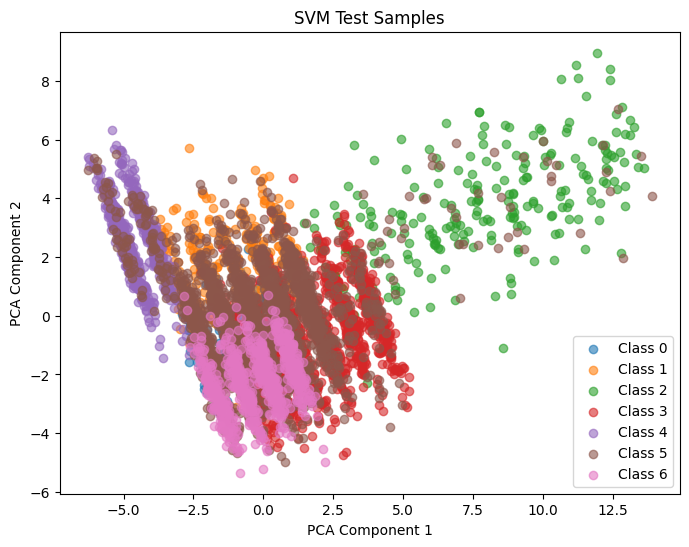

In [ ]:
# to 2D
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# samples
plt.figure(figsize=(8,6))
for class_label in np.unique(y_test):
    plt.scatter(
        X_test_2d[y_test==class_label, 0],
        X_test_2d[y_test==class_label, 1],
        label=f"Class {class_label}",
        alpha=0.6
    )


plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM Test Samples")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


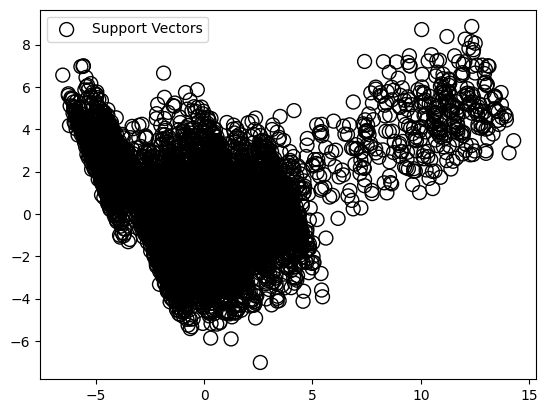

In [ ]:
sv = svm_model.support_vectors_
sv_2d = pca.transform(sv)
plt.scatter(sv_2d[:,0], sv_2d[:,1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.show()


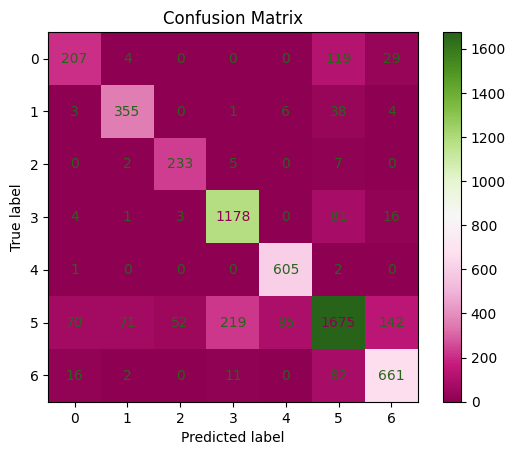

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))

disp.plot(cmap='PiYG')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 25 first predictios
for true, pred in zip(y_test[:25], y_pred[:20]):
    print(f"True: {true} → Predicted: {pred}")


True: 3 → Predicted: 3
True: 2 → Predicted: 2
True: 5 → Predicted: 5
True: 5 → Predicted: 5
True: 6 → Predicted: 6
True: 6 → Predicted: 6
True: 4 → Predicted: 4
True: 5 → Predicted: 5
True: 3 → Predicted: 3
True: 2 → Predicted: 2
True: 6 → Predicted: 6
True: 1 → Predicted: 1
True: 5 → Predicted: 3
True: 4 → Predicted: 4
True: 5 → Predicted: 3
True: 3 → Predicted: 3
True: 1 → Predicted: 1
True: 5 → Predicted: 5
True: 5 → Predicted: 5
True: 5 → Predicted: 3


In [ ]:
# orinala labels
original_labels = df['medical_condition']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(original_labels)


print(le.classes_)




['Arthritis' 'Asthma' 'Cancer' 'Diabetes' 'Healthy' 'Hypertension'
 'Obesity' nan]


In [ ]:
y_pred_named = le.inverse_transform(y_pred)
y_test_named = le.inverse_transform(y_test)

# 30 predictions
for true, pred in zip(y_test_named[:30], y_pred_named[:20]):
    print(f"Actual: {true} → Predicted: {pred}")


Actual: Diabetes → Predicted: Diabetes
Actual: Cancer → Predicted: Cancer
Actual: Hypertension → Predicted: Hypertension
Actual: Hypertension → Predicted: Hypertension
Actual: Obesity → Predicted: Obesity
Actual: Obesity → Predicted: Obesity
Actual: Healthy → Predicted: Healthy
Actual: Hypertension → Predicted: Hypertension
Actual: Diabetes → Predicted: Diabetes
Actual: Cancer → Predicted: Cancer
Actual: Obesity → Predicted: Obesity
Actual: Asthma → Predicted: Asthma
Actual: Hypertension → Predicted: Diabetes
Actual: Healthy → Predicted: Healthy
Actual: Hypertension → Predicted: Diabetes
Actual: Diabetes → Predicted: Diabetes
Actual: Asthma → Predicted: Asthma
Actual: Hypertension → Predicted: Hypertension
Actual: Hypertension → Predicted: Hypertension
Actual: Hypertension → Predicted: Diabetes


###SVC with linear kernel
Accuracy:79%

In [ ]:
svm_model2 = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_model2.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
y_pred2 = svm_model2.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.41      0.51       359
           1       0.81      0.74      0.78       407
           2       0.82      0.79      0.80       247
           3       0.84      0.86      0.85      1283
           4       0.86      0.99      0.92       608
           5       0.73      0.75      0.74      2324
           6       0.80      0.79      0.79       772

    accuracy                           0.79      6000
   macro avg       0.79      0.76      0.77      6000
weighted avg       0.78      0.79      0.78      6000



###SVC with poly kernel

Accuracy: 80%

In [ ]:
svm_model3 = SVC(kernel='poly', C=1.0, probability=True, random_state=42)
svm_model3.fit(X_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [ ]:
y_pred3 = svm_model3.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred3))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.41      0.51       359
           1       0.84      0.80      0.82       407
           2       0.82      0.77      0.79       247
           3       0.84      0.89      0.86      1283
           4       0.86      0.99      0.92       608
           5       0.78      0.74      0.76      2324
           6       0.74      0.87      0.80       772

    accuracy                           0.80      6000
   macro avg       0.79      0.78      0.78      6000
weighted avg       0.79      0.80      0.79      6000



###NuSVC
Accuracy: 51%

In [ ]:
model4 = NuSVC(nu=0.05, kernel='poly', probability=True)
model4.fit(X_train, y_train)

NuSVC(kernel='poly', nu=0.05, probability=True)

In [ ]:
y_pred4 = model4.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred4))

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.83      0.35       359
           1       0.61      0.93      0.74       407
           2       0.78      0.94      0.85       247
           3       0.57      0.94      0.71      1283
           4       0.86      0.96      0.91       608
           5       0.24      0.04      0.07      2324
           6       0.46      0.31      0.37       772

    accuracy                           0.51      6000
   macro avg       0.53      0.71      0.57      6000
weighted avg       0.45      0.51      0.42      6000



###LinearSVC

####hinge
Accuracy: 78%

In [ ]:
model_linearSVC = LinearSVC(loss='hinge', C=1.2, max_iter=2000)
model_linearSVC.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1.2, loss='hinge', max_iter=2000)

In [ ]:
y_pred5 = model_linearSVC.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred5))

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.11      0.17       359
           1       0.83      0.73      0.78       407
           2       0.81      0.80      0.80       247
           3       0.81      0.90      0.85      1283
           4       0.85      1.00      0.92       608
           5       0.75      0.75      0.75      2324
           6       0.77      0.83      0.80       772

    accuracy                           0.78      6000
   macro avg       0.74      0.73      0.72      6000
weighted avg       0.76      0.78      0.77      6000



####squared_hinge

Accuracy:78%

In [ ]:
model_linearSVC2 = LinearSVC(loss='squared_hinge', C=3, max_iter=1000)
model_linearSVC2.fit(X_train, y_train)

LinearSVC(C=3)

In [ ]:
y_pred6 = model_linearSVC2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Classification Report:")
print(classification_report(y_test, y_pred6))

Accuracy: 0.7778333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.26      0.38       359
           1       0.82      0.71      0.76       407
           2       0.82      0.75      0.78       247
           3       0.82      0.86      0.84      1283
           4       0.85      0.99      0.92       608
           5       0.73      0.76      0.74      2324
           6       0.78      0.80      0.79       772

    accuracy                           0.78      6000
   macro avg       0.79      0.73      0.74      6000
weighted avg       0.77      0.78      0.77      6000



##Logistic Regression
Accuracy: 78%

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_log = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Accuracy: 0.775

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.46      0.54       359
           1       0.79      0.71      0.75       407
           2       0.81      0.74      0.77       247
           3       0.84      0.83      0.84      1283
           4       0.86      0.97      0.91       608
           5       0.72      0.75      0.74      2324
           6       0.79      0.79      0.79       772

    accuracy                           0.78      6000
   macro avg       0.78      0.75      0.76      6000
weighted avg       0.77      0.78      0.77      6000


Confusion Matrix:
 [[ 164    1    0    0    0  178   16]
 [   3  288    0    1    5  102    8]
 [   0    5  182    6    0   54    0]
 [   2    1    0 1067    0  200   13]
 [   4    7    0    0  588    9    0]
 [  68   60   42  189   90 1754  121]
 [  10    1    0    6    0  148  607]]


##Random Forest
Accuracy: 82%

Changed n_estimators but there were not significant changes in accuracy

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=None,random_state=42)
rf_model.fit(X_train_ns, y_train_ns)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_ns)
print("Accuracy:", accuracy_score(y_test_ns, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test_ns, y_pred_rf))

Accuracy: 0.822

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.58       359
           1       0.83      0.87      0.85       407
           2       0.80      0.97      0.88       247
           3       0.83      0.93      0.88      1283
           4       0.86      0.99      0.92       608
           5       0.83      0.74      0.78      2324
           6       0.80      0.85      0.83       772

    accuracy                           0.82      6000
   macro avg       0.81      0.83      0.82      6000
weighted avg       0.82      0.82      0.82      6000



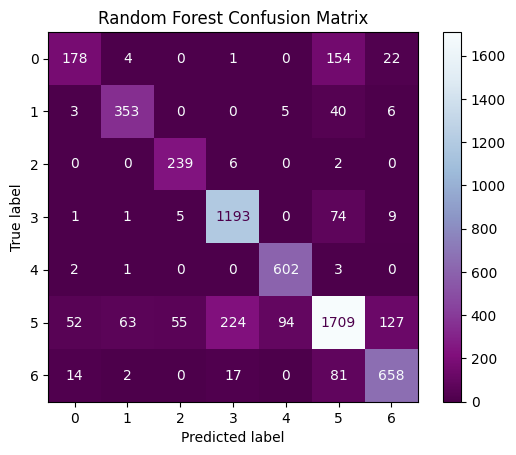

In [ ]:
cm = confusion_matrix(y_test_ns, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='BuPu_r')
plt.title("Random Forest Confusion Matrix")
plt.show()

##GradientBoostingClassifier

Accuracy: 81%

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=60,learning_rate=0.1,max_depth=3,random_state=42)
gb_model.fit(X_train_ns, y_train_ns)

GradientBoostingClassifier(n_estimators=60, random_state=42)

In [ ]:
y_pred_gb = gb_model.predict(X_test_ns)

print("Accuracy:", accuracy_score(y_test_ns, y_pred_gb))
print("Classification Report:\n", classification_report(y_test_ns, y_pred_gb))

Accuracy: 0.8081666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.51      0.61       359
           1       0.84      0.75      0.79       407
           2       0.81      0.93      0.86       247
           3       0.83      0.92      0.87      1283
           4       0.86      0.96      0.91       608
           5       0.78      0.75      0.76      2324
           6       0.80      0.81      0.80       772

    accuracy                           0.81      6000
   macro avg       0.81      0.80      0.80      6000
weighted avg       0.81      0.81      0.80      6000



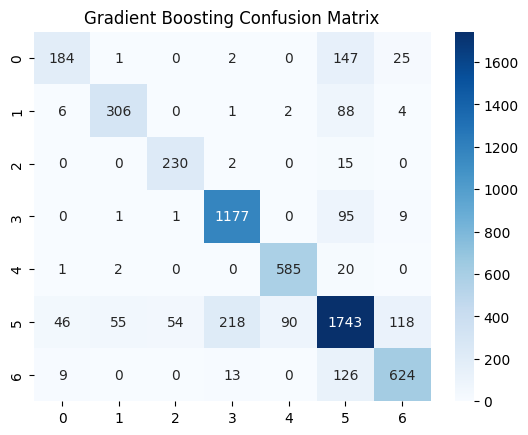

In [ ]:
cm = confusion_matrix(y_test_ns, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

##XGBoost Classifier
Accuracy: 81%

In [ ]:
xgb_model = XGBClassifier(objective='multi:softprob',  # multiclass probabilities
                          num_class=7,                  # number of classes
                          eval_metric='mlogloss'
                          )

xgb_model.fit(X_train_ns, y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=7, ...)

In [ ]:
y_predxgb = xgb_model.predict(X_test_ns)

print("Accuracy:", accuracy_score(y_test_ns, y_predxgb))
print("Classification Report:\n", classification_report(y_test_ns, y_predxgb))

Accuracy: 0.8161666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.60      0.62       359
           1       0.81      0.86      0.84       407
           2       0.81      0.95      0.87       247
           3       0.83      0.93      0.88      1283
           4       0.86      0.96      0.91       608
           5       0.83      0.72      0.77      2324
           6       0.79      0.85      0.82       772

    accuracy                           0.82      6000
   macro avg       0.80      0.84      0.82      6000
weighted avg       0.82      0.82      0.81      6000



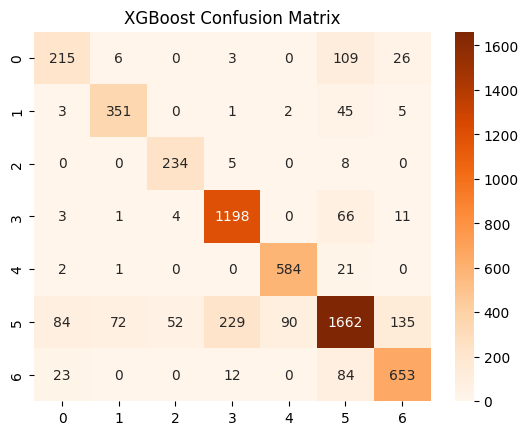

In [ ]:
cm = confusion_matrix(y_test, y_predxgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()

##Neural Network
Accuracy: 82%

In [ ]:

#nn_model = MLPClassifier(hidden_layer_sizes=(16,8), activation='relu', max_iter=500, random_state=42)
#nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, random_state=42)

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(128, 64, 32),  # three layers with decreasing size
    activation='relu',
    solver='adam',
    alpha=0.0005,                      # L2 regularization
    learning_rate_init=0.001,
    batch_size=64,
    max_iter=500,
    early_stopping=True,               # stops automatically when val loss stops improving
    n_iter_no_change=20,
    random_state=42,
    verbose=True)
nn_model.fit(X_train, y_train)

Iteration 1, loss = 0.71946353
Validation score: 0.815833
Iteration 2, loss = 0.54567822
Validation score: 0.820833
Iteration 3, loss = 0.52622720
Validation score: 0.822083
Iteration 4, loss = 0.51400375
Validation score: 0.820000
Iteration 5, loss = 0.50397429
Validation score: 0.823750
Iteration 6, loss = 0.49829072
Validation score: 0.824583
Iteration 7, loss = 0.49003921
Validation score: 0.828333
Iteration 8, loss = 0.48446400
Validation score: 0.821250
Iteration 9, loss = 0.48077183
Validation score: 0.830417
Iteration 10, loss = 0.47271046
Validation score: 0.825000
Iteration 11, loss = 0.46828151
Validation score: 0.824167
Iteration 12, loss = 0.46299024
Validation score: 0.829167
Iteration 13, loss = 0.45905834
Validation score: 0.819583
Iteration 14, loss = 0.45560813
Validation score: 0.823750
Iteration 15, loss = 0.45099472
Validation score: 0.817500
Iteration 16, loss = 0.44677594
Validation score: 0.829583
Iteration 17, loss = 0.44129134
Validation score: 0.821250
Iterat

MLPClassifier(alpha=0.0005, batch_size=64, early_stopping=True,
              hidden_layer_sizes=(128, 64, 32), max_iter=500,
              n_iter_no_change=20, random_state=42, verbose=True)

In [ ]:
y_pred_nn = nn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

Accuracy: 0.8183333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65       359
           1       0.82      0.88      0.85       407
           2       0.79      0.90      0.84       247
           3       0.81      0.94      0.87      1283
           4       0.86      0.99      0.92       608
           5       0.86      0.71      0.78      2324
           6       0.78      0.83      0.81       772

    accuracy                           0.82      6000
   macro avg       0.80      0.84      0.82      6000
weighted avg       0.82      0.82      0.82      6000



In [ ]:
print(y_pred_nn)
print(y_pred_nn[:10])

# Compare predicted vs true classes for the first 10 samples
for true, pred in zip(y_test[:10], y_pred_nn[:10]):
    print(f"True: {true}, Predicted: {pred}")

results = pd.DataFrame({'True Class': y_test,'Predicted Class': y_pred_nn})
print(results.head(20))

[3 2 5 ... 3 1 5]
[3 2 5 5 6 6 4 5 3 2]
True: 3, Predicted: 3
True: 2, Predicted: 2
True: 5, Predicted: 5
True: 5, Predicted: 5
True: 6, Predicted: 6
True: 6, Predicted: 6
True: 4, Predicted: 4
True: 5, Predicted: 5
True: 3, Predicted: 3
True: 2, Predicted: 2
       True Class  Predicted Class
21903           3                3
16450           2                2
28704           5                5
2393            5                5
8138            6                6
12800           6                6
11684           4                4
21534           5                5
17834           3                3
4143            2                2
26338           6                6
25548           1                1
17616           5                3
27103           4                4
16344           5                3
691             3                3
18575           1                1
1426            5                5
782             5                5
12891           5                3


##KNN
Accuracy: 80%

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15, metric='minkowski')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred_knn = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matric\n",confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.57      0.56       359
           1       0.83      0.83      0.83       407
           2       0.82      0.89      0.85       247
           3       0.83      0.90      0.86      1283
           4       0.84      0.99      0.91       608
           5       0.82      0.71      0.76      2324
           6       0.76      0.83      0.79       772

    accuracy                           0.80      6000
   macro avg       0.78      0.82      0.79      6000
weighted avg       0.80      0.80      0.80      6000

Confusion Matric
 [[ 205    3    0    0    1  118   32]
 [   6  339    0    0   14   43    5]
 [   0    1  219   15    0   12    0]
 [  11    0    1 1152    0   98   21]
 [   2    0    0    0  603    3    0]
 [ 118   62   48  207   97 1643  149]
 [  37    2    0   14    0   80  639]]


###KNN with k folds
Accuracy: 80%

In [ ]:
kf = KFold(n_splits=8, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

print("Accuracy for each fold:", scores)
print("Mean accuracy:", scores.mean())

# Explainability

*Classes : *
'Diabetes':0,
'Healthy':1,
'Asthma':2,
'Obesity':3,
'Hypertension':4,
'Cancer':5,
'Arthritis':6

## SHAP

In [ ]:
print(y_train.shape)
print(np.unique(y_train))


(24000,)
[0 1 2 3 4 5 6]


In [ ]:

X_test_sample = X_test.sample(10, random_state=42)
explainer = shap.KernelExplainer(
    model=nn_model.predict_proba,
    data=X_train.sample(100, random_state=42)
)
shap_values = explainer.shap_values(X_test_sample)


  0%|          | 0/10 [00:00<?, ?it/s]

Predicted Class 5


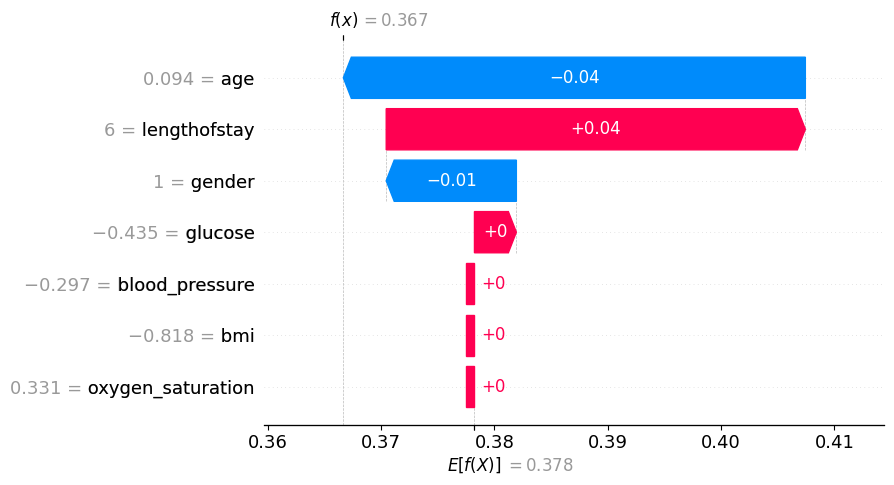

In [ ]:
instance_idx = 0
predicted_class = nn_model.predict(X_test_sample.iloc[[instance_idx]])[0]
print("Predicted Class",predicted_class)

shap_instance = shap_values[predicted_class][instance_idx] # SHAP values for that predicted class

base_val = explainer.expected_value[predicted_class]    # expected probability of the predicted class


shap.plots.waterfall(
    shap.Explanation(
        values=shap_instance,
        base_values=base_val,
        data=X_test_sample.iloc[instance_idx],
        feature_names=X_test_sample.columns
    )
)


In [ ]:
print(np.array(shap_values).shape)
print(X_test_sample.shape)


(10, 19, 7)
(10, 19)


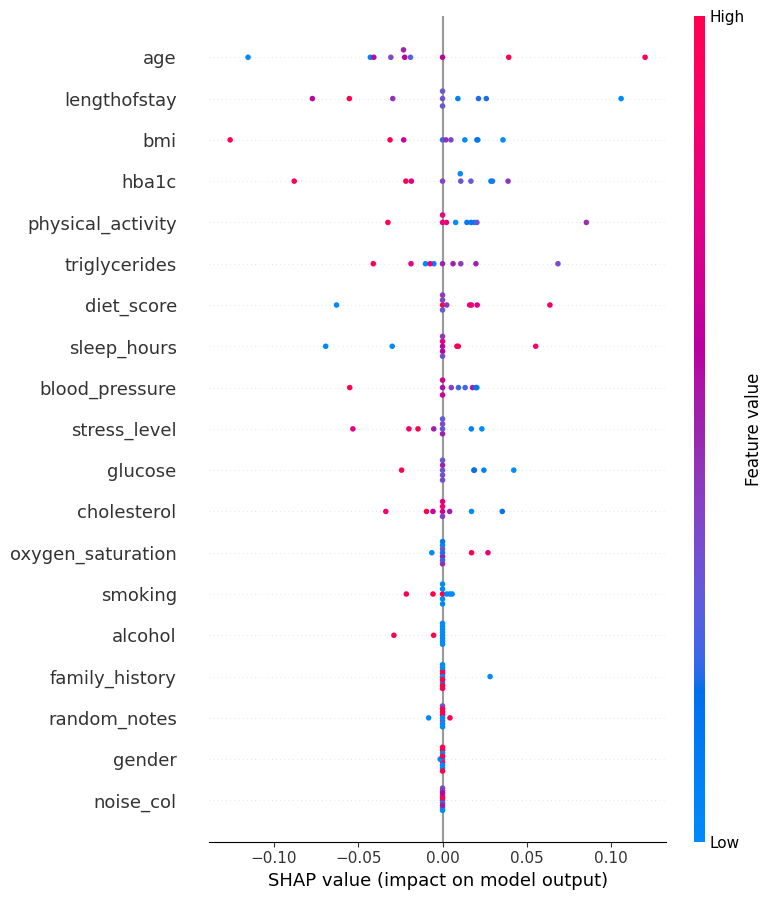

In [ ]:
class_idx = 0  # class
X_plot = X_test_sample.iloc[:10]

shap.summary_plot(
    shap_values[:, :, class_idx],   # (10, 19)
    X_plot,
    feature_names=X_test_sample.columns
)


Shap values for first sample, class: Healthy


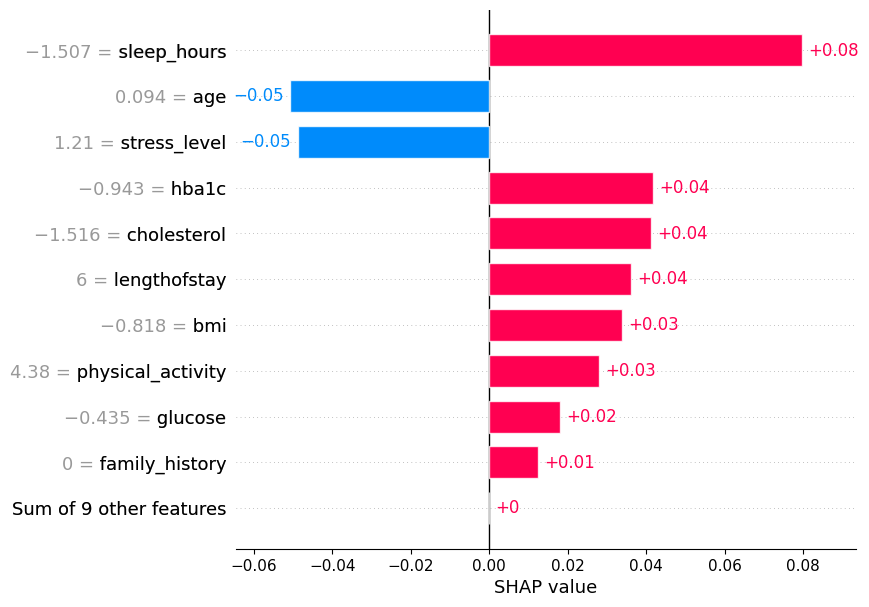

In [ ]:
i = 0            # sample
class_idx = 1
n_feats = 11

shap_vals_sample = shap_values[i, :, class_idx]

base_val = explainer.expected_value[class_idx]  # Base value for this Healthy


data_sample = X_test_sample.iloc[i] # Features

explanation = shap.Explanation(
    values=shap_vals_sample,
    base_values=base_val,
    data=data_sample,
    feature_names=X_test_sample.columns
)
print("Shap values for first sample, class: Healthy")
shap.plots.bar(explanation, max_display=n_feats)



In [ ]:
class_idx = 3  # obesity
mean_shap = np.abs(shap_values[:, :, class_idx]).mean(axis=0)

shap_importance = pd.Series(mean_shap, index=X_train.columns).sort_values(ascending=False)
print("Top features:\n\n", shap_importance.head(10))


Top features:

 hba1c                0.126352
glucose              0.067027
lengthofstay         0.034405
diet_score           0.016330
cholesterol          0.013596
age                  0.010489
family_history       0.007477
blood_pressure       0.007412
smoking              0.007294
physical_activity    0.006951
dtype: float64


## LIME

In [ ]:
explainer = LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names   = [str(i) for i in range(7)],  # for 7 classes
    mode          = 'classification',
    random_state  = 42
)


In [ ]:
sample_idx = 0
sample = X_test.iloc[sample_idx].values


In [ ]:
exp = explainer.explain_instance(
    data_row = sample,
    predict_fn = nn_model.predict_proba,  # for multi-class
    num_features = 10                     # top 10 features
)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [ ]:
exp.as_list()

[('age <= -0.52', 0.09586666449245597),
 ('hba1c > 0.47', -0.06626871888011965),
 ('glucose > 0.19', -0.055467476932808374),
 ('bmi > 0.59', -0.053576675559749036),
 ('oxygen_saturation <= -0.52', 0.05126915903568816),
 ('triglycerides > 0.66', -0.029278875222389707),
 ('sleep_hours > 0.70', -0.029234279765306962),
 ('alcohol <= 0.00', 0.02429035070501833),
 ('3.59 < physical_activity <= 5.07', 0.016856131604524476),
 ('-0.69 < diet_score <= -0.13', -0.016327326121313934)]

In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)


## PDB and ICE plots

In [ ]:
pdb_lines = partial_dependence(nn_model,
                               X,
                               ['age'],
                               percentiles=(0,1),
                               grid_resolution=100,
                               kind='individual'    # predictions for individual lines
                               )
len(pdb_lines['individual'][0])

30000

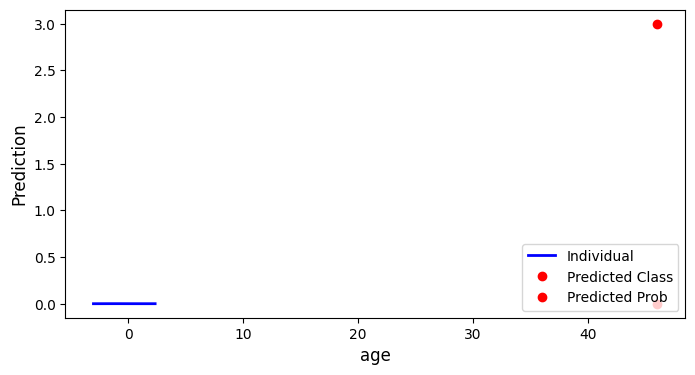

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(pdb_lines['grid_values'][0], pdb_lines['individual'][0][0], linewidth=2, color='blue', label='Individual')
per_0 = df.iloc[0] # actual area
plt.plot(per_0['age'], y_pred_nn[0], 'ro', label='Predicted Class')

#
y_pred_prob = nn_model.predict_proba(X)[:, 1]
plt.plot(per_0['age'], y_pred_prob[0], 'ro', label='Predicted Prob')

plt.ylabel('Prediction', size=12)
plt.xlabel('age', size=12)
plt.legend(loc='lower right')
plt.show()


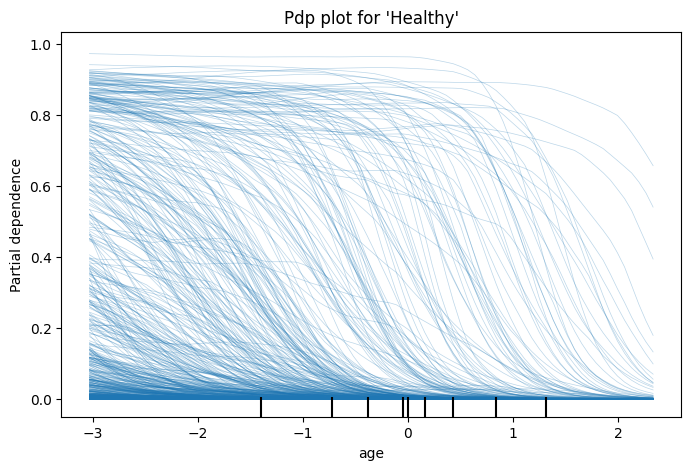

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

PartialDependenceDisplay.from_estimator(
    nn_model,
    X,
    features=[0],       # age
    kind='individual',  # ICE lines
    target=1,           # class index
    ax=ax
)
plt.title("Pdp plot for 'Healthy'")
plt.show()


## PDP and ICE

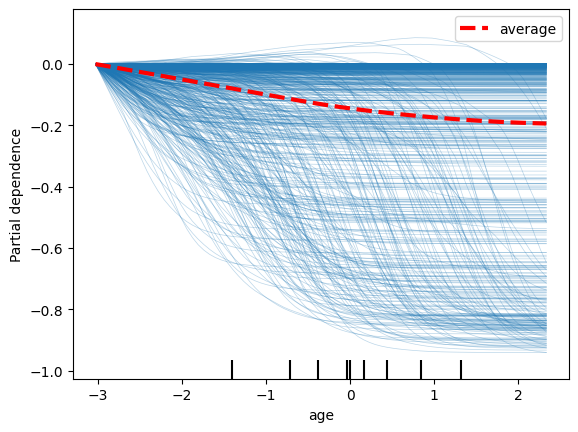

In [ ]:
features = X.columns.tolist()  # column names
feature_idx = 0                # first feature

PartialDependenceDisplay.from_estimator(
    nn_model,
    X,
    features=[features[feature_idx]],
    kind='both',
    target=1,                          # class 'Healthy'
    centered=True,
    pd_line_kw={'color':'red','lw':'3','linestyle':'--'},
)


In [ ]:
train_df = X_train.copy()
train_df['medical_condition'] = y_train

features = X_train.columns.tolist()


d = dice_ml.Data(
    dataframe=train_df,
    continuous_features=features,
    outcome_name='medical_condition'
)


In [ ]:
m = dice_ml.Model(model=nn_model, backend='sklearn')
exp = dice_ml.Dice(d, m, method='random')

In [ ]:
query_instance = X_test.iloc[[12]]
target_class = 5 # 'Cancer'

counterfactuals = exp.generate_counterfactuals(
    query_instances=query_instance,
    total_CFs=3,
    desired_class=target_class,
    features_to_vary=features
)
counterfactuals.visualize_as_dataframe()


100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

Query instance (original outcome : 3)


,age,gender,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col,medical_condition
0,0.908775,1,2.162959,-0.733067,-0.961151,-0.306464,3,0.105197,0.827309,-0.154802,1,0,5.29,-0.225439,1,-1.571811,-0.665041,1,0.539491,3



Diverse Counterfactual set (new outcome: 5)


,age,gender,glucose,blood_pressure,bmi,oxygen_saturation,lengthofstay,cholesterol,triglycerides,hba1c,smoking,alcohol,physical_activity,diet_score,family_history,stress_level,sleep_hours,random_notes,noise_col,medical_condition
0,0.908775,1,2.162959,-0.733067,-0.961151,-0.306464,3,0.105197,0.827309,-0.154802,1,0,5.29,2.466396,1,-1.571811,-0.665041,1,0.539491,5
1,0.908775,1,2.162959,-0.733067,-0.961151,-0.306464,3,1.339513,0.827309,-1.836038,1,0,5.29,-0.225439,1,-1.571811,-0.665041,1,0.539491,5
2,0.908775,1,2.162959,1.692295,-0.961151,-0.306464,3,2.083470,0.827309,-0.154802,1,0,5.29,-0.225439,1,-1.571811,-0.665041,1,0.539491,5


100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


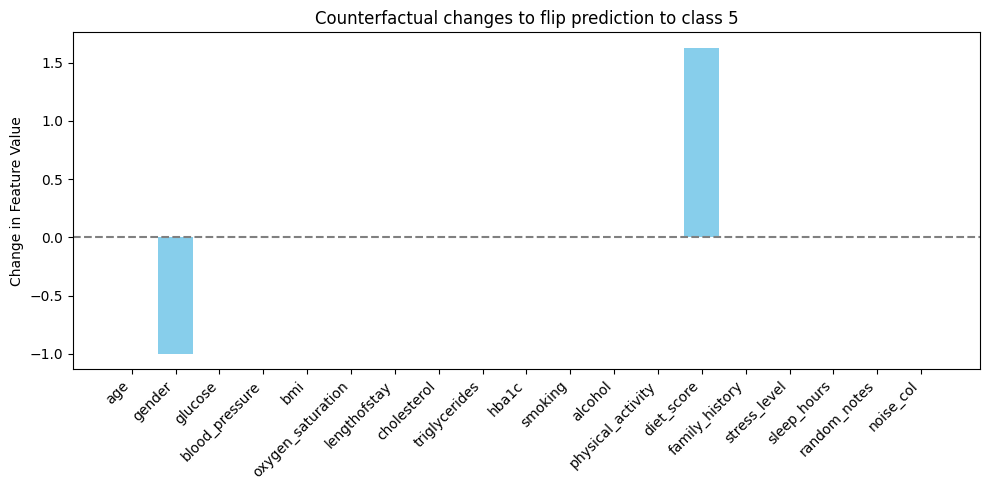

In [ ]:
query_instance = X_test.iloc[[12]]  # predicted as 'Obesity', actual: 'Cancer'
target_class = 5                   # 'Cancer'

counterfactuals = exp.generate_counterfactuals(
    query_instances=query_instance,
    total_CFs=1,                   # number of counterfactuals
    desired_class=target_class,
    features_to_vary=features
)

cf_df = counterfactuals.cf_examples_list[0].final_cfs_df
original = query_instance.iloc[0]


cf = cf_df.iloc[0] # first counterfactual
changes = {col: cf[col] - original[col]
           for col in cf.index if col != 'medical_condition'}

plt.figure(figsize=(10,5))
plt.bar(changes.keys(), changes.values(), color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Change in Feature Value')
plt.title(f'Counterfactual changes to flip prediction to class {target_class}')
plt.tight_layout()
plt.show()
